# <u>Name :</u> ADVAIT GURUNATH CHAVAN 
# <u>Email ID :</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__12

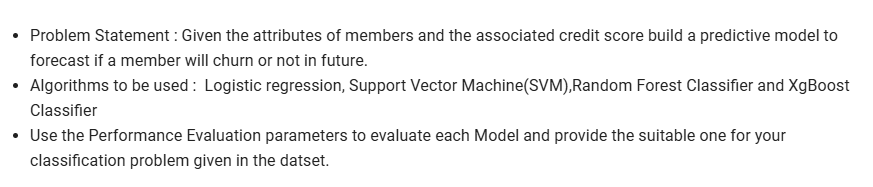

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## 1. Data Loading and Exploration

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2. Data Preprocessing

In [6]:
# Drop irrelevant features (commonly, RowNumber, CustomerId, and Surname are not useful for prediction)
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [8]:
# Define features and target variable.
# 'Exited' is our binary target: 1 means churn (exited), 0 means retained.
X = data.drop('Exited', axis=1)
y = data['Exited']

## 3. Split Data into Training and Testing Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Building Models

In [11]:
log_reg = LogisticRegression(random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)  # probability=True to enable predict_proba
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [12]:
models = {
    'Logistic Regression': log_reg,
    'SVM': svm_clf,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf
}

## 6. Model Training and Evaluation

In [13]:
results = []

In [14]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate evaluation metrics.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

C:\Users\Advait\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
results_df = pd.DataFrame(results)
print("\nModel Performance:\n")
results_df


Model Performance:



,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.8110,0.552448,0.201018,0.294776,0.778900
1,SVM,0.8560,0.769231,0.381679,0.510204,0.824750
2,Random Forest,0.8665,0.762500,0.465649,0.578199,0.865331
3,XGBoost,0.8640,0.713781,0.513995,0.597633,0.849537


### Logistic Regression:

#### Accuracy (0.8110) and ROC AUC (0.7789): These figures indicate that while Logistic Regression is better than a random guess, it lags in overall classification power when compared to the other models.

#### Low Recall (0.2010) and F1 Score (0.2948): The very low recall means that it is missing a large portion of the actual churn cases (high false negatives). Combined with a modest precision (0.5524), this suggests that the model struggles to balance between correctly identifying churners and not misclassifying non-churners.

### SVM (Support Vector Machine):

#### Improved Accuracy (0.8560) and Precision (0.7692): SVM delivers a noticeable improvement in accuracy over Logistic Regression. Its high precision indicates that when it predicts a churn, it is usually correct, thereby limiting false positives.

#### Moderate Recall (0.3817) and F1 Score (0.5120): The recall and F1 score, while better than those of Logistic Regression, still point to a non-optimal ability to capture all the churn cases, indicating a trade-off where the model is more conservative in predicting churn.

### Random Forest:

#### Highest Accuracy (0.8665) and ROC AUC (0.8653): Random Forest leads in overall performance. The high ROC AUC reflects its excellent ability to discriminate between churn and non-churn cases across different thresholds.

#### Balanced Precision (0.7625) and an Improved Recall (0.4656): This balance shows that Random Forest manages to reduce both false positives and false negatives better than Logistic Regression and SVM, making it a solid all-around performer.

#### F1 Score (0.5782): Though not the highest, it still indicates a good balance between precision and recall.

### XGBoost:

#### Comparable Accuracy (0.8640) to Random Forest: XGBoost performs similarly in terms of overall accuracy.

#### Strong Recall (0.5140) and Highest F1 Score (0.5976): The best recall among the models suggests that XGBoost is the most sensitive in correctly identifying churn cases. This is accompanied by a high F1 score, underscoring its effective balance between precision (0.7138) and recall.

#### ROC AUC (0.8495): Although slightly lower than that of Random Forest, it is still high, which supports the model’s robust discriminative abilities.

## 7. Visual Comparison with ROC Curves

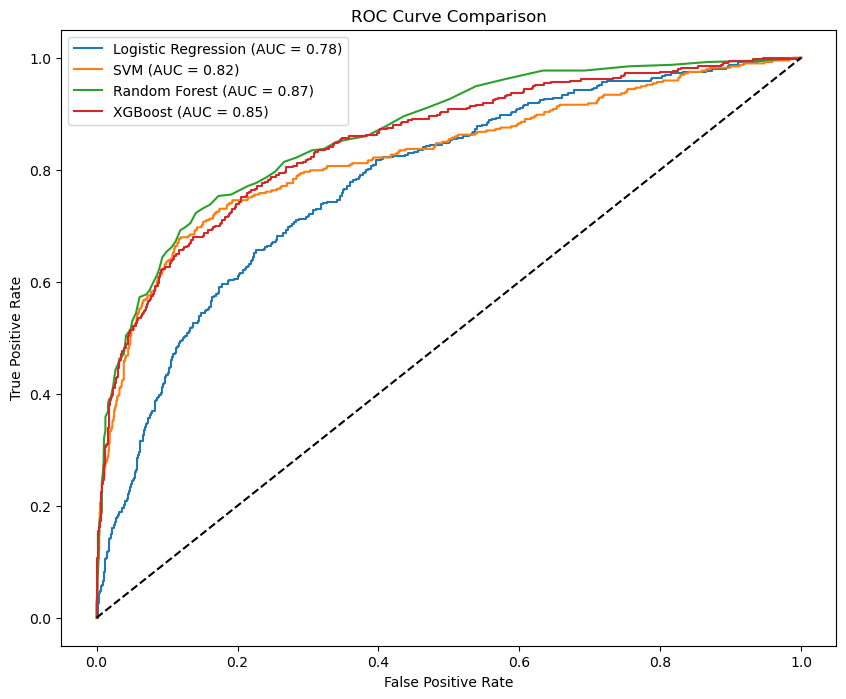

In [17]:
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

### Model Ranking by AUC:

### Random Forest (AUC = 0.87): Its curve is closest to the top-left corner, indicating it achieves higher true positive rates at lower false positive rates across almost all thresholds. This strong performance suggests that as the likelihood of churn increases, the model reliably identifies churners without raising too many false alarms.

### XGBoost (AUC = 0.85): Slightly behind Random Forest, XGBoost still demonstrates excellent performance. It maintains a good balance between sensitivity and specificity, making it a robust predictor in this setting.

### SVM (AUC = 0.82): The performance of the SVM is solid but not as pronounced as Random Forest and XGBoost. Its steeper slope indicates reasonable performance though with a relatively higher rate of false positives at comparable true positive rates.

### Logistic Regression (AUC = 0.78): While still performing well above random guessing, Logistic Regression lags behind the other models. This suggests that the linear decision boundaries it establishes might not capture all the nonlinear relationships present in the data.

## Trade-offs:

### If minimizing false negatives (i.e., capturing as many churners as possible) is a priority, the XGBoost model is preferable due to its highest recall and F1 score. This makes it valuable in scenarios where missing a churner is costly.

### If the cost of false positives is a concern, SVM’s high precision might be more attractive, though its overall sensitivity remains moderate.

### Random Forest stands out in overall discriminative power (given by its high ROC AUC) and offers a balanced set of metrics, making it a robust candidate for deployment if overall performance across multiple metrics is desired.